In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
cars = pd.read_csv('cars_sampled.csv')
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [3]:
#selecting necessary columns
data = cars.drop(['dateCrawled','name','dateCreated','postalCode','lastSeen','model','abtest'],axis=1)
data.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,limousine,2003,manual,150,150000,3,diesel,bmw,NaN
1,private,offer,13299,suv,2005,manual,163,150000,6,diesel,volvo,no
2,private,offer,3200,bus,2003,manual,101,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,small car,2006,manual,86,60000,12,petrol,seat,no
4,private,offer,18750,suv,2008,automatic,185,150000,11,diesel,volvo,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   vehicleType          44813 non-null  object
 4   yearOfRegistration   50001 non-null  int64 
 5   gearbox              47177 non-null  object
 6   powerPS              50001 non-null  int64 
 7   kilometer            50001 non-null  int64 
 8   monthOfRegistration  50001 non-null  int64 
 9   fuelType             45498 non-null  object
 10  brand                50001 non-null  object
 11  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.6+ MB


In [5]:
#checking null values
data.isna().sum()

seller                    0
offerType                 0
price                     0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

In [6]:
# unique values
for x in data.columns:
    if data[x].dtype == 'object':
        
        print('Variable Name: ',data[x].name,'\n',pd.unique(data[x]))
        print(data[x].value_counts(),'\n')

Variable Name:  seller 
 ['private' 'commercial']
private       49999
commercial        2
Name: seller, dtype: int64 

Variable Name:  offerType 
 ['offer' 'request']
offer      49998
request        3
Name: offerType, dtype: int64 

Variable Name:  vehicleType 
 ['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' nan 'others'
 'cabrio']
limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64 

Variable Name:  gearbox 
 ['manual' 'automatic' nan]
manual       36732
automatic    10445
Name: gearbox, dtype: int64 

Variable Name:  fuelType 
 ['diesel' 'petrol' nan 'cng' 'lpg' 'hybrid' 'electro' 'other']
petrol     30214
diesel     14347
lpg          778
cng           80
hybrid        39
other         26
electro       14
Name: fuelType, dtype: int64 

Variable Name:  brand 
 ['bmw' 'volvo' 'volkswagen' 'seat' 'opel' 'merced

Since most of the seller are private, there is no point in considering this variable for prediction

Similarly, in variable offer type most of the values are for 'offer' only. Hence this variable is also neglected

In [7]:
# dropping the unwanted variables
data.drop(['seller','offerType'],axis=1,inplace=True)

In [8]:
# inferencial statistics
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000


##### From above statistics, it is clear that 
1. price variable is not uniformly distributed
2. year of registration has outliers i.e.,invalid values (min = 1000 and max = 9999)
3. power ps also has outliers i.e.,invalid values

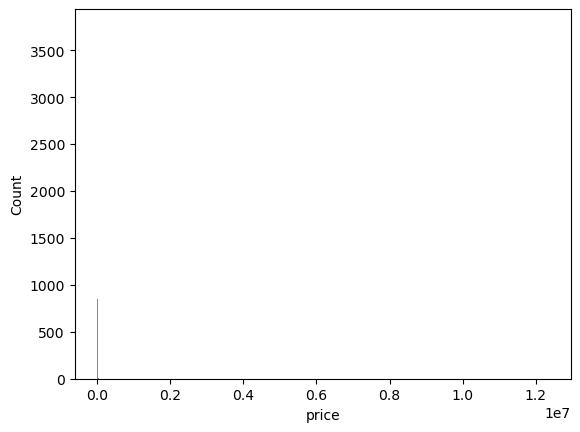

In [9]:
# plotting output variable
sns.histplot(data.price)
plt.show()

In [10]:
# dropping all the NaN values
data = data.dropna().reset_index(drop='first')

In [11]:
#deleting duplicate records
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35418 entries, 0 to 36056
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                35418 non-null  int64 
 1   vehicleType          35418 non-null  object
 2   yearOfRegistration   35418 non-null  int64 
 3   gearbox              35418 non-null  object
 4   powerPS              35418 non-null  int64 
 5   kilometer            35418 non-null  int64 
 6   monthOfRegistration  35418 non-null  int64 
 7   fuelType             35418 non-null  object
 8   brand                35418 non-null  object
 9   notRepairedDamage    35418 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.0+ MB


In [13]:
# checking how many records have price as more than 100000
len(data[data.price>100000])

47

Only 47 records have price as more than 100000

In [14]:
# checking how many records have price as more than 100
len(data[data.price<100])

542

In [15]:
# fixing the range of values for few features
data = data[(data.yearOfRegistration >= 1970) &
           (data.yearOfRegistration <= 2018) &
           (data.price >= 100) &
           (data.price <= 100000) &
           (data.powerPS >= 10) &
           (data.powerPS <= 500)]
data.reset_index(drop='first')

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,13299,suv,2005,manual,163,150000,6,diesel,volvo,no
1,4500,small car,2006,manual,86,60000,12,petrol,seat,no
2,18750,suv,2008,automatic,185,150000,11,diesel,volvo,no
3,988,limousine,1995,manual,90,150000,2,petrol,volkswagen,no
4,1399,coupe,1997,manual,136,150000,11,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...
33300,990,limousine,1999,manual,136,150000,2,petrol,opel,no
33301,10900,limousine,2004,manual,231,150000,8,petrol,bmw,no
33302,790,limousine,1998,manual,82,150000,9,diesel,opel,no
33303,830,small car,1999,manual,60,125000,8,petrol,renault,no


In [16]:
#creating new column 'AGE'
from datetime import datetime
data['age'] = round((datetime.now().year - data.yearOfRegistration) + ((datetime.now().month - data.monthOfRegistration)/12),2)

In [17]:
# dropping the columns
data.drop(['yearOfRegistration','monthOfRegistration'],axis=1,inplace=True)

In [18]:
# checking corelation between the variables
data.corr()

,price,powerPS,kilometer,age
price,1.000000,0.591347,-0.468286,-0.502157
powerPS,0.591347,1.000000,-0.012022,-0.211237
kilometer,-0.468286,-0.012022,1.000000,0.433153
age,-0.502157,-0.211237,0.433153,1.000000


In [19]:
#encoding the label
from sklearn.preprocessing import LabelEncoder

In [20]:
# encoding vehicle type variable
encod_type = LabelEncoder()
data.vehicleType = encod_type.fit_transform(data.vehicleType)

pd.DataFrame(zip(encod_type.classes_,encod_type.transform(encod_type.classes_)),columns=['vehicleType','encoded'])

,vehicleType,encoded
0,bus,0
1,cabrio,1
2,coupe,2
3,limousine,3
4,others,4
5,small car,5
6,station wagon,6
7,suv,7


In [21]:
# encoding Gearbox variable
encod_gear = LabelEncoder()
data.gearbox = encod_gear.fit_transform(data.gearbox)

pd.DataFrame(zip(encod_gear.classes_,encod_gear.transform(encod_gear.classes_)),columns=['gearbox','encoded'])

,gearbox,encoded
0,automatic,0
1,manual,1


In [22]:
# encoding fuel type varianle
encod_fuel = LabelEncoder()
data.fuelType = encod_fuel.fit_transform(data.fuelType)

pd.DataFrame(zip(encod_fuel.classes_,encod_fuel.transform(encod_fuel.classes_)),columns=['fuel_type','encoded'])

,fuel_type,encoded
0,cng,0
1,diesel,1
2,electro,2
3,hybrid,3
4,lpg,4
5,other,5
6,petrol,6


In [23]:
# Encoding brand variable
encod_brand = LabelEncoder()
data.brand = encod_brand.fit_transform(data.brand)

pd.DataFrame(zip(encod_brand.classes_,encod_brand.transform(encod_brand.classes_)),columns=['brand','encoded'])

,brand,encoded
0,alfa_romeo,0
1,audi,1
2,bmw,2
3,chevrolet,3
4,chrysler,4
5,citroen,5
6,dacia,6
7,daewoo,7
8,daihatsu,8
9,fiat,9


In [24]:
# encoding repair variable
encod_repair = LabelEncoder()
data.notRepairedDamage = encod_repair.fit_transform(data.notRepairedDamage)

pd.DataFrame(zip(encod_repair.classes_,encod_repair.transform(encod_repair.classes_)),columns=['Repair','encoded'])

,Repair,encoded
0,no,0
1,yes,1


In [25]:
# exporting all the encoders
import pickle
pickle.dump(encod_type,open('pickle_files/vehicle_type.pkl','wb'))
pickle.dump(encod_gear,open('pickle_files/gearbox.pkl','wb'))
pickle.dump(encod_fuel,open('pickle_files/fuel_type.pkl','wb'))
pickle.dump(encod_brand,open('pickle_files/brand.pkl','wb'))
pickle.dump(encod_repair,open('pickle_files/repair.pkl','wb'))

In [26]:
# dataset after encoding
data.head()

,price,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,age
0,13299,7,1,163,150000,1,39,0,16.17
1,4500,5,1,86,60000,6,30,0,14.67
2,18750,7,0,185,150000,1,39,0,12.75
3,988,3,1,90,150000,6,38,0,26.50
4,1399,2,1,136,150000,6,20,0,23.75


In [27]:
#splitting data into input and output
x = data.drop('price',axis=1)
y = data.price

In [28]:
# output variable 'price' is log transformed 
y1 = np.log(y)

In [29]:
#scaling the input data
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

x1 = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x1

,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,age
0,1.000000,1.0,0.312245,1.000000,0.166667,1.000000,0.0,0.266832
1,0.714286,1.0,0.155102,0.379310,1.000000,0.769231,0.0,0.235853
2,1.000000,0.0,0.357143,1.000000,0.166667,1.000000,0.0,0.196200
3,0.428571,1.0,0.163265,1.000000,1.000000,0.974359,0.0,0.480173
4,0.285714,1.0,0.257143,1.000000,1.000000,0.512821,0.0,0.423379
...,...,...,...,...,...,...,...,...
33300,0.428571,1.0,0.257143,1.000000,1.000000,0.615385,0.0,0.397563
33301,0.428571,1.0,0.451020,1.000000,1.000000,0.051282,0.0,0.283974
33302,0.428571,1.0,0.146939,1.000000,0.166667,0.615385,0.0,0.406237
33303,0.714286,1.0,0.102041,0.827586,1.000000,0.692308,0.0,0.387237


In [30]:
# exporting the scalar function
import pickle
pickle_out = open('pickle_files/scalar.pkl','wb')
pickle.dump(scalar,pickle_out)
pickle_out.close()

In [31]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=1)

print('Shape of Spliting')
print(f'x_train={x_train.shape}, y_train={y_train.shape}, x_test={x_test.shape}, y_test={y_test.shape}')

Shape of Spliting
x_train=(26644, 8), y_train=(26644,), x_test=(6661, 8), y_test=(6661,)


## Building Model

In [32]:
# importing neccesary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initializing the linear regression
lin = LinearRegression()

In [33]:
def get_results(model):
    # fitting on train and predicting for test data
    pred = model.fit(x_train,y_train).predict(x_test)
    
    #calculate RMSE
    RMSE = np.sqrt(mean_squared_error(y_test,pred))
    
    #calculate r2 score
    r2 = r2_score(y_test,pred)
    
    # printing the results
    print('RMSE = {}, r2_score = {}'.format(RMSE,r2))
    
    return RMSE, r2

In [34]:
# getting the results for linear regression algorithm
RMSE_lin, r2_lin = get_results(lin)

RMSE = 0.6078732344839062, r2_score = 0.7086839655264587
